<a href="https://colab.research.google.com/github/ShinUkhang/AI/blob/main/%EB%B6%93%EA%BD%83%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

붓꽃의 세가지 분류를 해보겠습니다. 

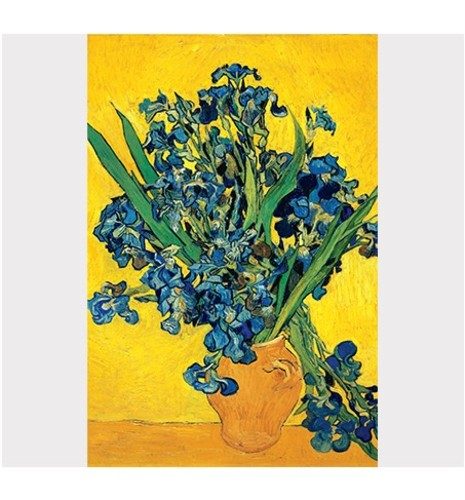

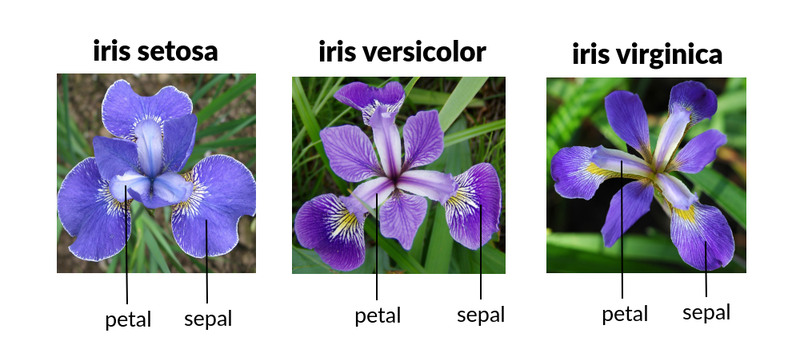

분류할 데이터를 불러옵니다.

**(# 표시는 주석으로 컴퓨터가 코드로 생각하지 않습니다.)**

In [ ]:
#구글 코랩의 files라는 모듈을 불러옵니다. 
from google.colab import files 
uploaded=files.upload()

Saving Iris.csv to Iris.csv


판다스(표,테이블을 다루는 파이썬)으로 파일을 불러옵니다.

파일이름을 정확하게 입력해야 오류가 없습니다. 

In [ ]:
import pandas as pd
data=pd.read_csv('Iris.csv') #파일을 못 읽으면 encoding='cp949'을 추가해서 실행하세요. 
data=pd.DataFrame(data) 


데이터를 살펴봅시다.

SepalLength : 꽃받침의 길이

SepalWidth : 꽃받침의 폭

PetalLength : 꽃잎의 길이

PetalWidth : 꽃잎의 폭

Name : 붓꽃의 종류

Iris-setosa  =0

Iris-versicolor  =1

Iris-virginica  =2


In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


평균, 표준편차, 최솟값,최댓값, 사분위수를 확인합니다.

In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


데이터의 형태와 갯수를 확인합니다.
(float64는 실수라는 뜻입니다.)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


데이터를 히스토그램으로 시각화했습니다.

확률과통계 시간에 배운 정규분포곡선을 나타내는 자료는 무엇인지 확인해봅시다. **(히스토그램이 나타내는 넓이는 모두 1 입니다.)**

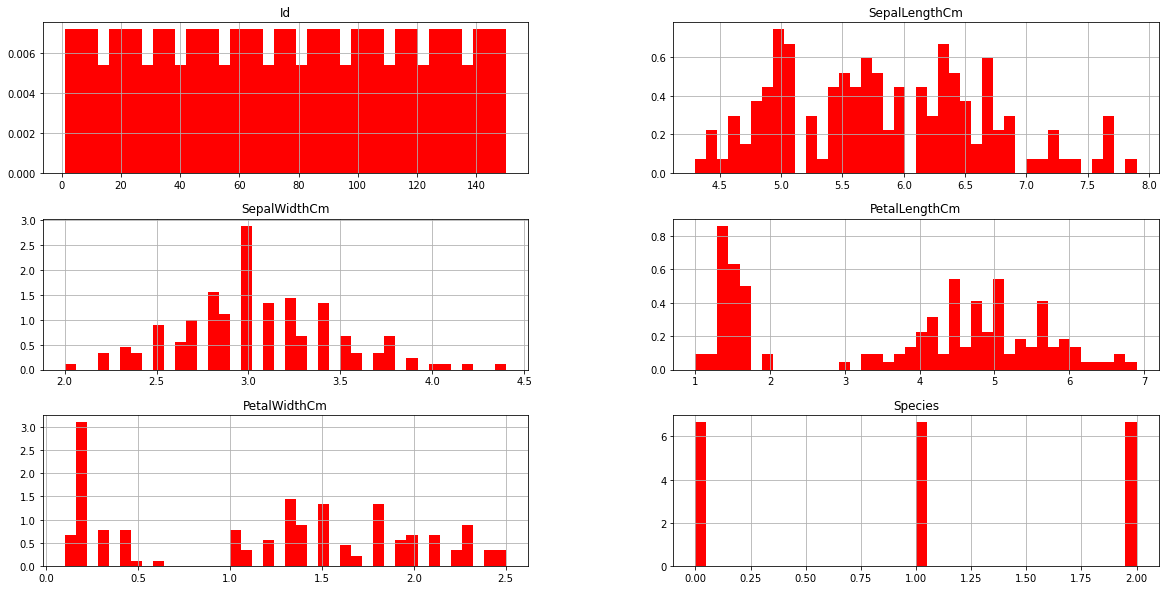

In [ ]:
#맷플롯립은 데이터를 시각화하여 표와 그래로 보여주는 모듈입니다.
#hist는 히스토그램을 의미하여 bins는 계급의 갯수, density는 상대도수, figsize는 크기, color는 색상입니다.
import matplotlib.pyplot as plt  
data.hist(bins=40, density=True, color='red',figsize=(20,10)) 
plt.show()

데이터 간의 상관계수를 확인합니다.

(결정계수도 있지만 최대한 코드를 간단하게 하고자 합니다.)

In [ ]:
corr_matrix=data.corr()# 상관계수를 확인합니다. 
corr_matrix['Species']

Id               0.942830
SepalLengthCm    0.782561
SepalWidthCm    -0.419446
PetalLengthCm    0.949043
PetalWidthCm     0.956464
Species          1.000000
Name: Species, dtype: float64

상관계수가 높은 성분을 2개 선택해보았습니다.

 'total sulfur dioxide','volatile acidity'를 x,y축으로 두고 색상은 와인분류(target)으로 두고 표현했습니다.

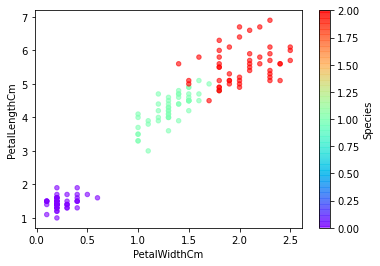

In [ ]:
#cmap은 수치에 맞게 색상을 구분하여 표현한 것입니다. 검색을 해보시면 rainbow외에 다양한 것이 있습니다. 
#alpha는 투명도인데 산점도가 겹쳐도 보이도록 합니다.
#sharex는 그래프 테두리를 사라지게 해서 예쁘게 보입니다. 필수적인 요소는 아닙니다. 
data.plot(kind='scatter', x='PetalWidthCm',y='PetalLengthCm',cmap='rainbow',c='Species' , alpha=0.6, sharex=False) #scatter는 산점도, c는 색상대상, cmap은 색, alpha는 투명도, sharex는 테두리 없애기
plt.show()

데이터의 결측치를 제거합니다. 

결측치는 빈칸입니다. 빈칸을 처리하는 방법은 0, 평균, 앞의수, 뒤의수 등 다양하게 채우는 방법이 있지만 , 여기서는 빈칸이 있는 행은 모두 삭제하겠습니다.

In [ ]:
data=data.dropna()

In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

11개의 데이터를 선택해보았습니다.

In [ ]:
x=data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y=data['Species']

데이터를 분할해보겠습니다.

전체데이터를 훈련데이터와 테스트데이터 2개로 나눕니다. 

In [ ]:
from sklearn.model_selection import train_test_split #데이터를 나누는 sklearn모듈을 불러옵니다. 
x_train,x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

데이터의 행태를 확인합니다.

위에서 선택한 11개의 성분을 묶어서 벡터(1차원 텐서)가 됩니다.

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


$$정규화={x-min\over{max-min}}$$

모든 수치를 0과 1사이의 값으로 변환합니다. 

In [ ]:
max=x_train.max(axis=0)
min=x_train.min(axis=0)

In [ ]:
print(max)
print(min)

SepalLengthCm    7.7
SepalWidthCm     4.2
PetalLengthCm    6.7
PetalWidthCm     2.5
dtype: float64
SepalLengthCm    4.3
SepalWidthCm     2.0
PetalLengthCm    1.1
PetalWidthCm     0.1
dtype: float64


데이터를 모두 정규화시켜줍니다.

In [ ]:
x_train-=min
x_train/=(max-min)
x_test-=min
x_test/=(max-min)

인공신경망 모델을 만들고자 합니다. 

In [ ]:
from tensorflow import keras #인공신경망을 다루는 파이썬 모듈
from tensorflow.keras.models import Sequential #인공신경망 시작한다는 뜻
from tensorflow.keras.layers import Dense # 인공신경망의 층을 넣는다는 뜻

model = Sequential()
model.add(Dense(10, input_dim=4,activation='relu')) # 성분이 4개이므로 노드 4개짜리 입력층 추가, relu는 활성화 함수
model.add(Dense(3, activation='softmax')) #출력층(꽃이 3가지)
opt=keras.optimizers.SGD(learning_rate=0.2) #확률적 경사하강법, 학습률 확인
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc']) #분류는 loss를 sparse~로 지정, 정확도 acc지정

모델을 실행합니다. 
epoch는 반복횟수이고, batch_size는 훈련데이터 단위입니다.

예를 들면 100개의 데이터에서 epoch=5, batch_size=10이면
100개를 10개씩 묶어주고 묶음마다 1개만 훈련합니다.
이러한 방법으로 5회 반복합니다.

그리고 시간을 확인하면서 배치사이즈와 에포크에 따라 비교합시다. 

In [ ]:
import time
a=time.time()
hist = model.fit(x_train, y_train, shuffle=True, epochs=5, batch_size=1)
b=time.time()
print(b-a)

Epoch 1/5
105/105 [==============================] - 0s 1ms/step - loss: 0.1649 - acc: 0.9238
Epoch 2/5
105/105 [==============================] - 0s 2ms/step - loss: 0.1916 - acc: 0.9429
Epoch 3/5
105/105 [==============================] - 0s 2ms/step - loss: 0.1663 - acc: 0.9429
Epoch 4/5
105/105 [==============================] - 0s 2ms/step - loss: 0.1957 - acc: 0.9143
Epoch 5/5
105/105 [==============================] - 0s 2ms/step - loss: 0.1321 - acc: 0.9524
1.32464599609375


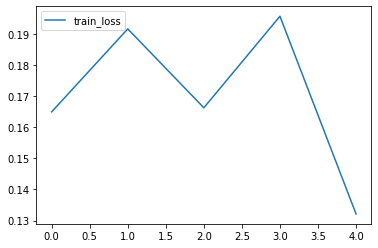

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='train_loss')
plt.legend()
plt.show()

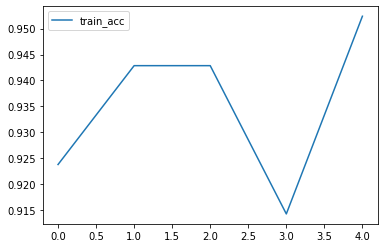

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'],  label='train_acc')
plt.legend()
plt.show()

**생존분류** 예측하기 

In [ ]:
y_pred=model.predict(x_test)

2/2 [==============================] - 0s 8ms/step


In [ ]:
z=[[5,3,1,0.1]]

In [ ]:
np.argmax(model.predict(z))

1/1 [==============================] - 0s 34ms/step


0

In [ ]:
import numpy as np
y_pred=np.argmax(model.predict(x_test), axis=-1)
print(y_pred)

2/2 [==============================] - 0s 5ms/step
[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


확률과통계시간에 배운 조건부확률을 확인할 수 있습니다. 

우리가 사용한 정확도(acc)는 전체에서 정확하게 분류한 비율입니다.

$$정확도(acc)={정확한 분류\over{전체 꽃}}$$

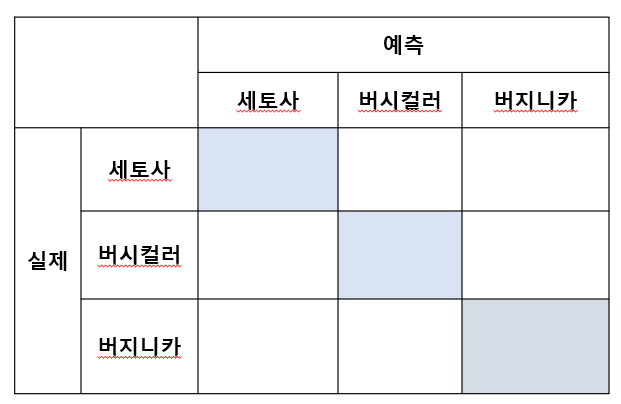

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)


array([[19,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 13]])